In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
import warnings
warnings.filterwarnings("ignore")

import matplotlib
font = {'size'   : 14}
matplotlib.rc('font', **font)

In [2]:
neg,avs,avm,avf,ri,rd = np.zeros((8,8)),np.zeros((8,8)),np.zeros((8,8)),np.zeros((8,8)),np.zeros((8,8)),np.zeros((8,8))
for m in range(8):
    for n in range(8):
        dnm = np.load('data/k3_v/m' + str(m+4) + '_n' + str(n+4) + '.npy')
        diff = dnm[:,0] - dnm[:,2]
        neg[m,n] = np.sum(diff<0)
        avs[m,n] = np.mean(dnm[:,0])
        avm[m,n] = np.mean(dnm[:,1])
        avf[m,n] = np.mean(dnm[:,2])
        ri[m,n] = (avs[m,n] - avf[m,n]) / avs[m,n]
        rd[m,n] = (avm[m,n] - avs[m,n]) / avs[m,n]
        
np.sum(neg)

156.0

0.06296257354694776

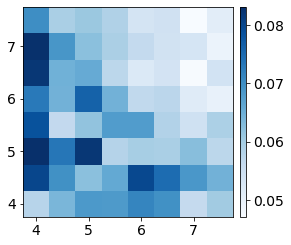

In [3]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
im = ax.imshow(rd, cmap='Blues', vmin=np.min(rd), vmax=np.max(rd), origin='lower');
xtk = 3+np.arange(0,8)
ax.set_xticklabels(xtk)
ax.set_yticklabels(xtk);
div = make_axes_locatable(ax)
cax = div.append_axes("right", size="3%", pad=0.1)
plt.colorbar(im, cax=cax);
np.mean(rd)

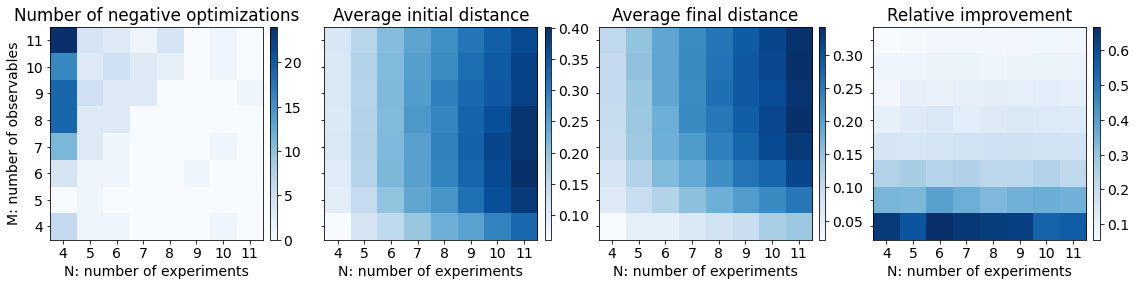

In [4]:
fig, ax = plt.subplots(1,4,figsize=(16,4),sharey=True)

im0 = ax[0].imshow(neg, cmap='Blues', vmin=np.min(neg), vmax=np.max(neg), origin='lower')
ax[0].set_title('Number of negative optimizations')
im1 = ax[1].imshow(avs, cmap='Blues', vmin=np.min(avs), vmax=np.max(avs), origin='lower')
ax[1].set_title('Average initial distance')
im2 = ax[2].imshow(avf, cmap='Blues', vmin=np.min(avf), vmax=np.max(avf), origin='lower')
ax[2].set_title('Average final distance')
im3 = ax[3].imshow(ri, cmap='Blues', vmin=np.min(ri), vmax=np.max(ri), origin='lower')
ax[3].set_title('Relative improvement')

ax[0].set_ylabel('M: number of observables');
iml = [im0,im1,im2,im3]
xtk = 4+np.arange(0,8)
for i in range(4):
    a = ax[i]
    a.set_xticks(np.arange(0,8))
    a.set_yticks(np.arange(0,8))
    a.set_xticklabels(xtk)
    a.set_yticklabels(xtk);
    a.set_xlabel('N: number of experiments')
    
    div = make_axes_locatable(a)
    cax = div.append_axes("right", size="3%", pad=0.1)
    plt.colorbar(iml[i], cax=cax);
    
fig.tight_layout()

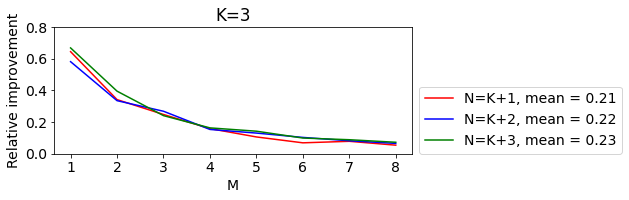

In [5]:
fig,ax = plt.subplots(1,1,figsize=(9,3))
ax.plot(1+np.arange(0,8), ri[:8,0], label='N=K+1, mean = %.2f' % np.mean(ri[:,0]), color = 'r')
ax.plot(1+np.arange(0,8), ri[:8,1], label='N=K+2, mean = %.2f' % np.mean(ri[:,1]), color = 'b')
ax.plot(1+np.arange(0,8), ri[:8,2], label='N=K+3, mean = %.2f' % np.mean(ri[:,2]), color = 'g')
ax.legend(loc=(1.02,0))
ax.set_ylim(0,0.8);
ax.set_ylabel('Relative improvement');
ax.set_xlabel('M');
ax.set_title('K=3')
fig.tight_layout()

In [6]:
fig.savefig('figures/k3-lines.pdf')

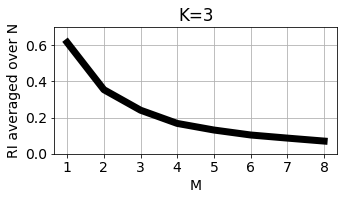

In [7]:
xtk = 1+np.arange(0,8)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(xtk, np.mean(ri[0:8,0:8], axis=1), color = 'k', lw=7)
'''for i in range(8):
    ax.plot(1+np.arange(0,8), ri[:,i], label='N=K+%d' % (i+1))'''
#ax.legend(loc=(1.02,0))
ax.set_ylim(0,0.7);
ax.set_ylabel('RI averaged over N');
ax.set_xlabel('M');
ax.set_title('K=3')
ax.set_xticks(xtk)
ax.grid(True)
fig.tight_layout()

In [8]:
fig.savefig('figures/k3-average.pdf')

In [9]:
np.mean(ri, axis=1)

array([0.61483817, 0.3540819 , 0.24070872, 0.1676886 , 0.13129131,
       0.10385009, 0.08665557, 0.07023268])

In [10]:
np.save('data/ri/ri3.npy', ri)
print(ri)

[[0.6446415  0.5814124  0.66825412 0.64900896 0.63563657 0.63106235
  0.54818566 0.56050381]
 [0.34202388 0.33536142 0.39534044 0.36082074 0.33192941 0.35264983
  0.36280779 0.35172167]
 [0.24816037 0.26851891 0.24083012 0.2501875  0.22471214 0.22485278
  0.24727813 0.22112977]
 [0.15894318 0.15368564 0.16359477 0.17312356 0.17673218 0.1753544
  0.17352111 0.16655392]
 [0.10636522 0.13079764 0.14268769 0.12105809 0.13029053 0.14489969
  0.1365803  0.13765132]
 [0.06926141 0.10345989 0.09948063 0.10776801 0.11348954 0.10849231
  0.11970341 0.10914556]
 [0.07882422 0.0822254  0.08883985 0.08790139 0.07952607 0.08988427
  0.09318739 0.09285598]
 [0.05445012 0.06563965 0.07281789 0.07156528 0.06892464 0.07581366
  0.07690424 0.07574596]]
